<a href="https://colab.research.google.com/github/dhaura/PCII/blob/main/VGG16_model_6266.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --no-check-certificate \
  https://datasets.simula.no/kvasir/data/kvasir-dataset-v2.zip\
  -O /tmp/kvasir-dataset-v2.zip

--2021-03-06 09:28:54--  https://datasets.simula.no/kvasir/data/kvasir-dataset-v2.zip
Resolving datasets.simula.no (datasets.simula.no)... 128.39.36.14
Connecting to datasets.simula.no (datasets.simula.no)|128.39.36.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2489312085 (2.3G) [application/zip]
Saving to: ‘/tmp/kvasir-dataset-v2.zip’

/tmp/kvasir-dataset 100%[===================>]   2.32G  7.24MB/s    in 9m 11s  

2021-03-06 09:38:05 (4.31 MB/s) - ‘/tmp/kvasir-dataset-v2.zip’ saved [2489312085/2489312085]



In [2]:
import os
import zipfile

local_zip = '/tmp/kvasir-dataset-v2.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

In [3]:
try:
    os.mkdir('/tmp/kvasir-dataset-e-v2')
    os.mkdir('/tmp/kvasir-dataset-e-v2/training')
    os.mkdir('/tmp/kvasir-dataset-e-v2/testing')
    os.mkdir('/tmp/kvasir-dataset-e-v2/training/dyed-lifted-polyps')
    os.mkdir('/tmp/kvasir-dataset-e-v2/training/dyed-resection-margins')
    os.mkdir('/tmp/kvasir-dataset-e-v2/training/esophagitis')
    os.mkdir('/tmp/kvasir-dataset-e-v2/training/normal-cecum')
    os.mkdir('/tmp/kvasir-dataset-e-v2/training/normal-pylorus')
    os.mkdir('/tmp/kvasir-dataset-e-v2/training/normal-z-line')
    os.mkdir('/tmp/kvasir-dataset-e-v2/training/polyps')
    os.mkdir('/tmp/kvasir-dataset-e-v2/training/ulcerative-colitis')
    os.mkdir('/tmp/kvasir-dataset-e-v2/testing/dyed-lifted-polyps')
    os.mkdir('/tmp/kvasir-dataset-e-v2/testing/dyed-resection-margins')
    os.mkdir('/tmp/kvasir-dataset-e-v2/testing/esophagitis')
    os.mkdir('/tmp/kvasir-dataset-e-v2/testing/normal-cecum')
    os.mkdir('/tmp/kvasir-dataset-e-v2/testing/normal-pylorus')
    os.mkdir('/tmp/kvasir-dataset-e-v2/testing/normal-z-line')
    os.mkdir('/tmp/kvasir-dataset-e-v2/testing/polyps')
    os.mkdir('/tmp/kvasir-dataset-e-v2/testing/ulcerative-colitis')
except OSError:
    pass

In [4]:
import random
import shutil
from shutil import copyfile

def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    selected_images = []
    
    for image in os.listdir(SOURCE):
        image_path = SOURCE + image
        if (os.path.getsize(image_path) > 0):
            selected_images.append(image)
    
    shuffled_images = random.sample(selected_images, len(selected_images))
    
    len_train_images = int(len(selected_images) * SPLIT_SIZE)
    
    for image in shuffled_images[0:len_train_images]:
        copyfile(SOURCE+image, TRAINING+image)
    
    for image in shuffled_images[len_train_images:]:
        copyfile(SOURCE+image, TESTING+image)

In [5]:
split_size = .8
split_data('/tmp/kvasir-dataset-v2/dyed-lifted-polyps/', '/tmp/kvasir-dataset-e-v2/training/dyed-lifted-polyps/', '/tmp/kvasir-dataset-e-v2/testing/dyed-lifted-polyps/', split_size)
split_data('/tmp/kvasir-dataset-v2/dyed-resection-margins/', '/tmp/kvasir-dataset-e-v2/training/dyed-resection-margins/', '/tmp/kvasir-dataset-e-v2/testing/dyed-resection-margins/', split_size)
split_data('/tmp/kvasir-dataset-v2/esophagitis/', '/tmp/kvasir-dataset-e-v2/training/esophagitis/', '/tmp/kvasir-dataset-e-v2/testing/esophagitis/', split_size)
split_data('/tmp/kvasir-dataset-v2/normal-cecum/', '/tmp/kvasir-dataset-e-v2/training/normal-cecum/', '/tmp/kvasir-dataset-e-v2/testing/normal-cecum/', split_size)
split_data('/tmp/kvasir-dataset-v2/normal-pylorus/', '/tmp/kvasir-dataset-e-v2/training/normal-pylorus/', '/tmp/kvasir-dataset-e-v2/testing/normal-pylorus/', split_size)
split_data('/tmp/kvasir-dataset-v2/normal-z-line/', '/tmp/kvasir-dataset-e-v2/training/normal-z-line/', '/tmp/kvasir-dataset-e-v2/testing/normal-z-line/', split_size)
split_data('/tmp/kvasir-dataset-v2/polyps/', '/tmp/kvasir-dataset-e-v2/training/polyps/', '/tmp/kvasir-dataset-e-v2/testing/polyps/', split_size)
split_data('/tmp/kvasir-dataset-v2/ulcerative-colitis/', '/tmp/kvasir-dataset-e-v2/training/ulcerative-colitis/', '/tmp/kvasir-dataset-e-v2/testing/ulcerative-colitis/', split_size)

In [6]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import applications

In [7]:
base_dir = '/tmp/kvasir-dataset-e-v2'

train_dir = os.path.join(base_dir, 'training')
validation_dir = os.path.join(base_dir, 'testing')

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=128,
    class_mode='categorical'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(224,224),
    batch_size=128,
    class_mode='categorical'
)

Found 6400 images belonging to 8 classes.
Found 1600 images belonging to 8 classes.


In [8]:
# local_weights_file = 'inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
model = applications.VGG16(weights = "imagenet", include_top=False, input_shape = (224, 224, 3))

# pre_trained_model.load_weights(local_weights_file)

for layer in model.layers:
    layer.trainable = False

model.summary()



58892288/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________________________________

In [12]:
from tensorflow.keras import optimizers
for layer in model.layers[:20]:
    layer.trainable = True
x = model.output
x =  tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(1024, activation="relu")(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(1024, activation="relu")(x)
predictions = tf.keras.layers.Dense(8, activation="softmax")(x)   
model_final = tf.keras.models.Model(model.input,predictions)
model_final.compile(loss = "categorical_crossentropy", optimizer = optimizers.SGD(lr=0.0001, momentum=0.9), metrics=["accuracy"])

In [13]:
model_final.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [14]:
history = model_final.fit_generator(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 5,
            epochs = 50,
            validation_steps = 5,
            verbose = 1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
5/5 [==============================] - 36s 8s/step - loss: 2.2188 - accuracy: 0.1610 - val_loss: 2.1231 - val_accuracy: 0.1500
Epoch 2/50
5/5 [==============================] - 33s 7s/step - loss: 2.2512 - accuracy: 0.1252 - val_loss: 2.0676 - val_accuracy: 0.1625
Epoch 3/50
5/5 [==============================] - 33s 7s/step - loss: 2.1513 - accuracy: 0.1673 - val_loss: 2.0634 - val_accuracy: 0.1516
Epoch 4/50
5/5 [==============================] - 33s 7s/step - loss: 2.1310 - accuracy: 0.1411 - val_loss: 2.0592 - val_accuracy: 0.1719
Epoch 5/50
5/5 [==============================] - 33s 7s/step - loss: 2.1081 - accuracy: 0.1551 - val_loss: 2.0364 - val_accuracy: 0.1906
Epoch 6/50
5/5 [==============================] - 33s 7s/step - loss: 2.1069 - accuracy: 0.1692 - val_loss: 2.0059 - val_accuracy: 0.1969
Epoch 7/50
5/5 [==============================] - 33s 7s/step - loss: 2.0807 - accuracy: 0.1721 - val_loss: 1.9720 - val_accuracy: 0.2469
Epoch 8/50
5/5 [==================

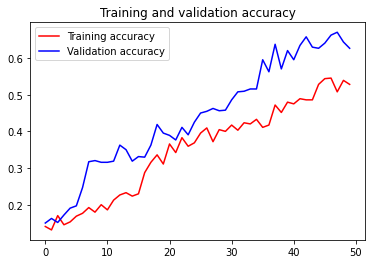

<Figure size 432x288 with 0 Axes>

In [15]:


import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()